![unnamed (1).png](<unnamed (1).png>)

# Analysing Customer Churn Data - Predicting Behavior to Retain Customers



Rayyan Minhaj (Data Science Intern - 10Pearls)

---

## Module 1: Data Preprocessing, EDA, Feature Engineering
The Telco Customer Churn Dataset is about customer churn for a telecommunications company, containing information on customer demographics, services, account information, and churn status.

In [8]:
import pandas as pd

df = pd.read_csv('TelcoCustomerChurn.csv')
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [11]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


21 Features (Columns) & 7032 Customers (Rows)

In [28]:
df.mean(numeric_only=True)

SeniorCitizen        0.162400
tenure              32.421786
MonthlyCharges      64.798208
TotalCharges      2283.300441
dtype: float64

In [13]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

We can analyse that there are no missing values in the features, however, there are are multiple values in some features that reference "No" with other textual context. In order to maintain the same naming convention we can simply replace those values in the dataframe.

In [25]:
df['MultipleLines'] = df['MultipleLines'].replace('No phone service', 'No')
df['OnlineSecurity'] = df['OnlineSecurity'].replace('No internet service', 'No')
df['OnlineBackup'] = df['OnlineBackup'].replace('No internet service', 'No')
df['DeviceProtection'] = df['DeviceProtection'].replace('No internet service', 'No')
df['TechSupport'] = df['TechSupport'].replace('No internet service', 'No')
df['StreamingTV'] = df['StreamingTV'].replace('No internet service', 'No')
df['StreamingMovies'] = df['StreamingMovies'].replace('No internet service', 'No')

In [26]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Before we decide which features might be useful for determining whether a customer is likely to stay or leave (churn) and one-hot encode them, we can visualise the dataset to better understand the current trends/stats.

C:\Users\Asus\AppData\Local\Temp\ipykernel_13760\2906961744.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Churn', data=df, palette=colors)


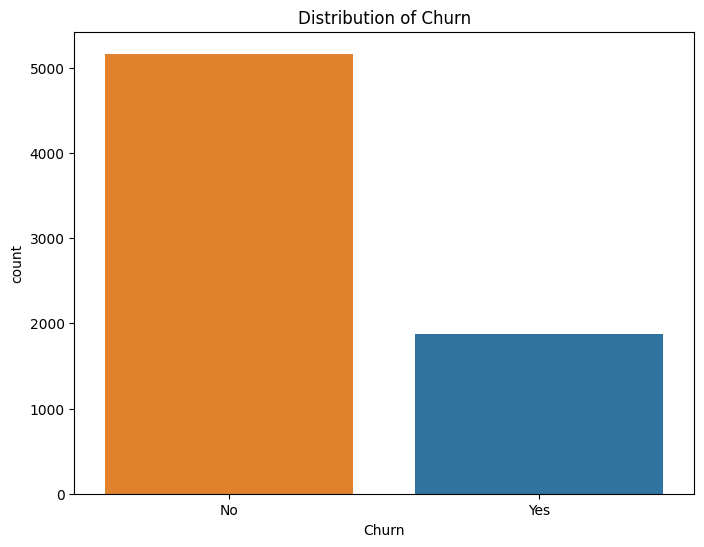

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

colors = ['#ff7f0e', '#1f77b4']


plt.figure(figsize=(8, 6))
sns.countplot(x='Churn', data=df, palette=colors)
plt.title('Distribution of Churn')
plt.show()

We can clearly make out the imbalance between the majority of customers who did not churn and the ones who did.

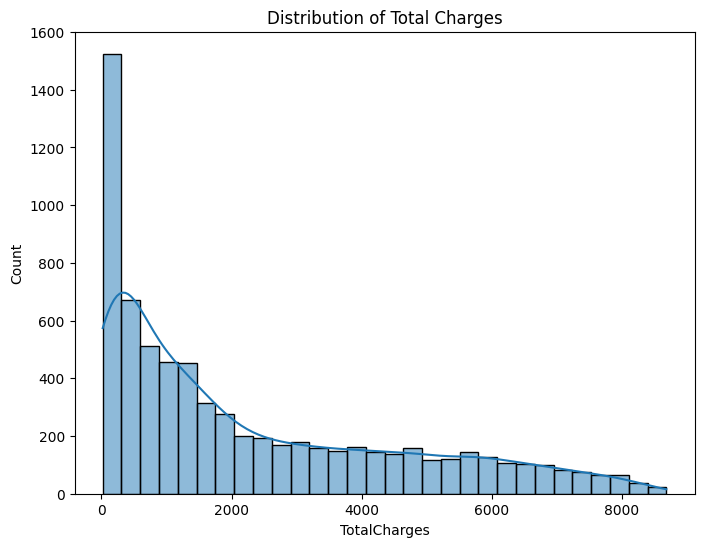

In [44]:
plt.figure(figsize=(8, 6))
sns.histplot(df['TotalCharges'], bins=30, kde=True) #30 intervals or data range. 
#30 bins typically offer enough detail to observe patterns and variations in the data without making the plot 
#too cluttered or difficult to interpret

plt.title('Distribution of Total Charges')
plt.show()

Total charges follow a right-skewed distribution, with most customers generating lower total charges.

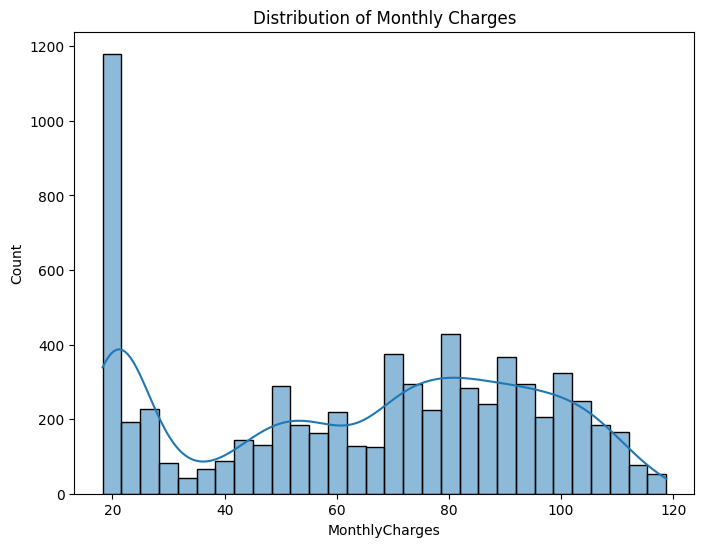

In [40]:
plt.figure(figsize=(8, 6))
sns.histplot(df['MonthlyCharges'], bins=30, kde=True)
plt.title('Distribution of Monthly Charges')
plt.show()

Monthly charges are widely distributed, with a peak around the mid-range, indicating varied customer billing amounts.

### Now we can One-Hot Encode the data

In [ ]:
df.dtypes

In [79]:
categorical_columns = df.select_dtypes(include=['object']).columns #We can only encode those columns that are categorical so its important to only select those columns

# Exclude 'customerID' column as it is a unique identifier
categorical_columns = categorical_columns[categorical_columns != 'customerID']

data_encoded = pd.get_dummies(df, columns=categorical_columns) #purposely not doing "drop_first=True" so that we can have a more comprehensive feature representation 
#but because we need only a single churn column as our target feature, i am dropping one of the two Churn columns

data_encoded = data_encoded.drop('Churn_No', axis=1)
data_encoded = data_encoded.rename(columns={'Churn_Yes': 'Churn'})


data_encoded.head()


,customerID,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,SeniorCitizen_0,SeniorCitizen_1,Partner_No,Partner_Yes,...,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn
0,7590-VHVEG,1,29.85,29.85,True,False,True,False,False,True,...,True,False,False,False,True,False,False,True,False,False
1,5575-GNVDE,34,56.95,1889.50,False,True,True,False,True,False,...,False,True,False,True,False,False,False,False,True,False
2,3668-QPYBK,2,53.85,108.15,False,True,True,False,True,False,...,True,False,False,False,True,False,False,False,True,True
3,7795-CFOCW,45,42.30,1840.75,False,True,True,False,True,False,...,False,True,False,True,False,True,False,False,False,False
4,9237-HQITU,2,70.70,151.65,True,False,True,False,True,False,...,True,False,False,False,True,False,False,True,False,True


In [80]:
data_encoded.to_csv('processed_churn_data.csv', index=False)

### Plotting a Correlation Matrix now that we have encoded the features

To create a correlation matrix, the data must be in a numerical format. Encoding categorical variables is required because the correlation matrix requires numerical inputs to calculate the pairwise correlations between features

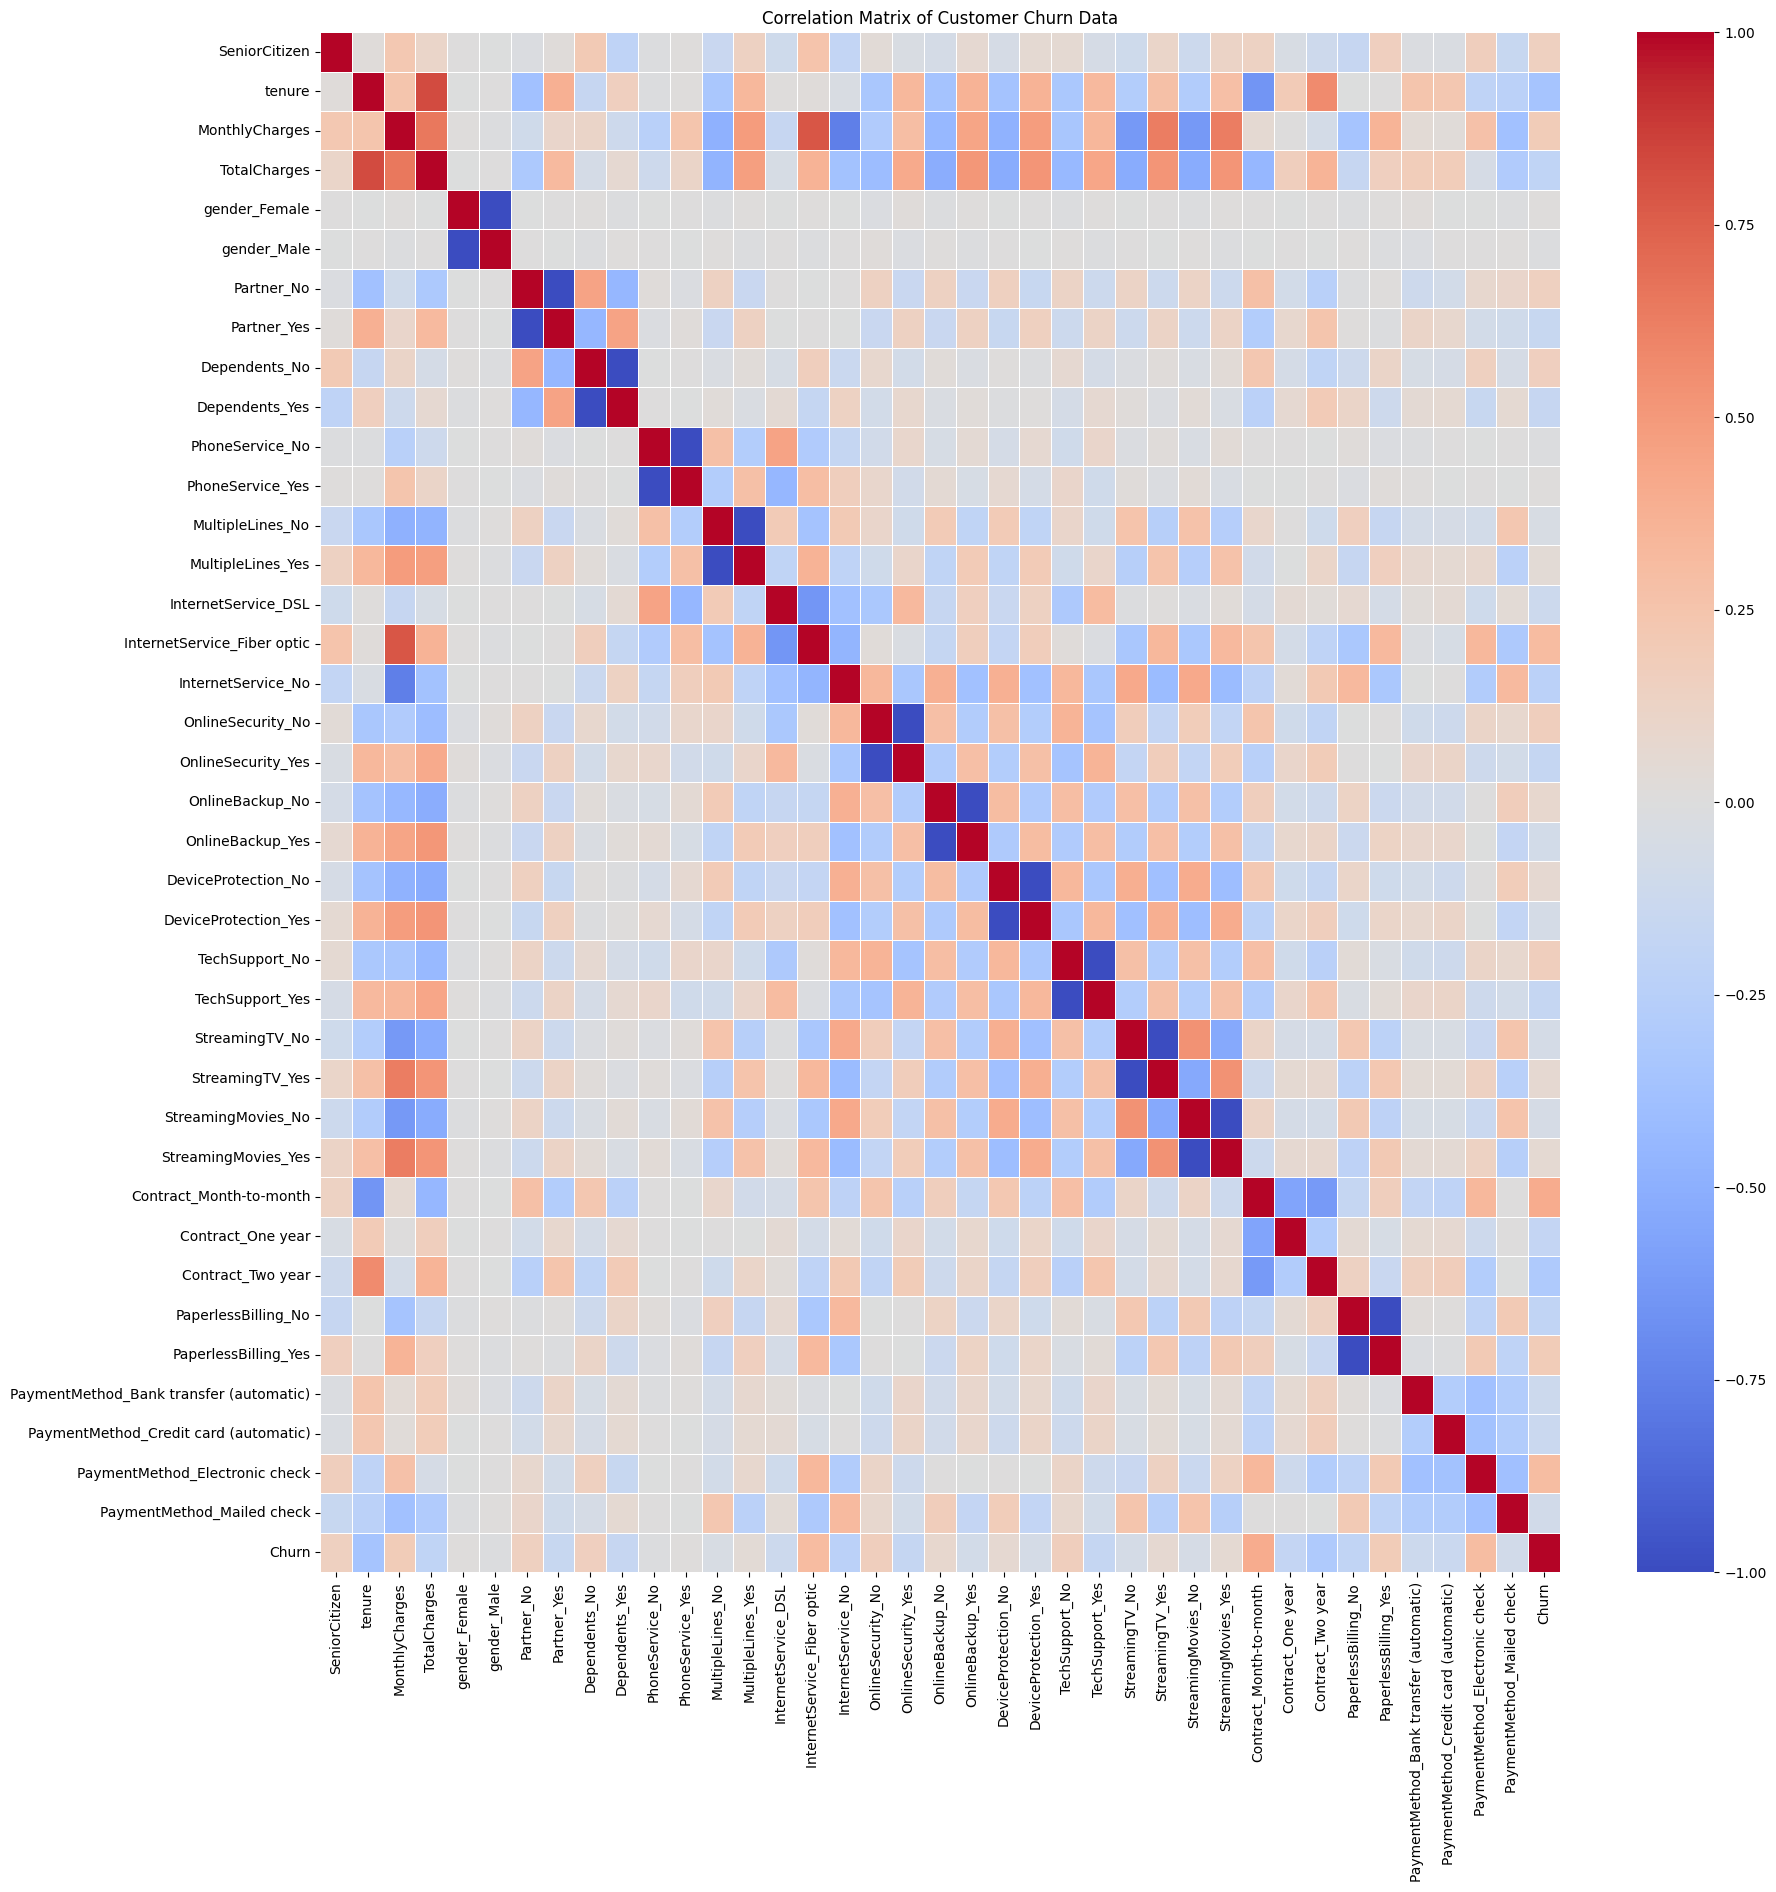

In [70]:
df_without_id= data_encoded.drop(columns=['customerID']) #cant have anything besides numeric values
correlation_matrix = df_without_id.corr()


plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Customer Churn Data')
plt.show()

This matrix now represents the correlations between the numeric features and the one-hot encoded categorical features in the dataset. For example we can look at the hot/cold contrast between gender_Male and gender_Female.

Through this correlation map, we can deduce that:
* Churn has a relatively strong positive correlation with MonthlyCharges and Contract_Month-to-month, indicating customers with higher monthly charges and month-to-month contracts are more likely to churn.

* Churn has a negative correlation with tenure, Contract_One year, and Contract_Two year, suggesting customers with longer tenure and longer contracts are less likely to churn.